# Inferential Statistics
## Author : Ashish Kumar Patra

In [1]:
# Filtering out the warnings and importing the required libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import scale
import researchpy as rp
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [2]:
# data = sns.load_dataset("tips")
# data.to_csv(r'C:\Users\ASHISH\Desktop\DataSets\tips_data.csv', index=False, header=True)

### About the Dataset (tips_data.csv)
Attribute Information:

The dataset are related to different tips amount of a restaurant in different time (lunch and dinner) with respect to different days of the week and either the person is smoker or non-smoker. 

    1 - total_bill
    2 - tip
    3 - sex
    4 - smoker
    5 - day
    6 - time
    7 - size

## 1. Load the Dataset:

In [3]:
tips = pd.read_csv('C:\\Users\\ASHISH\\Desktop\\DataSets\\tips_data.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 2. Independent Two Sample T-Test:
## (A) Is there a difference in the total bill for different meals ?

In [4]:
tips.groupby('time')["total_bill"].describe().T

time,Dinner,Lunch
count,176.000000,68.000000
mean,20.797159,17.168676
std,9.142029,7.713882
min,3.070000,7.510000
25%,14.437500,12.235000
50%,18.390000,15.965000
75%,25.282500,19.532500
max,50.810000,43.110000


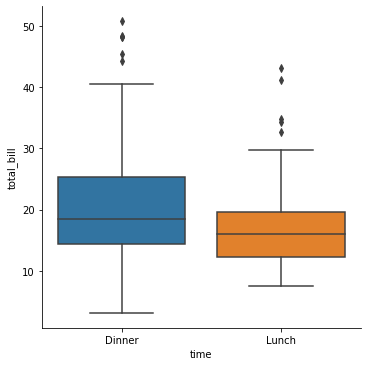

In [5]:
sns.catplot(x="time", y="total_bill", kind="box", data=tips)
plt.show()

### Creating 2 independent samples

In [6]:
tips_lunch = tips[(tips["time"]== "Lunch")]
tips_lunch.shape

(68, 7)

In [7]:
tips_dinner = tips[(tips["time"]== "Dinner")]
tips_dinner.shape

(176, 7)

### Sampling to make the sample size equal

In [8]:
tips_dinner = tips_dinner.sample(68, random_state=12)
tips_dinner.shape

(68, 7)

### Levene's test to test the variance:

* Null Hypothesis : Variance of 2 groups is same.
* Alternative Hypothesis : Variance is not same.

In [9]:
stats.levene(tips_lunch["total_bill"], tips_dinner["total_bill"])

LeveneResult(statistic=0.0870560856198507, pvalue=0.76841028768732)

* At 5% (0.05) Level of Significance, p-value is not < 0.05.
* Hence, we Do Not Reject the Null Hypothesis.
* To conclude, Variance of 2 groups is Same.

### Difference between 2 samples and by scaling it

In [10]:
diff = scale(np.array(tips_lunch["total_bill"]) - np.array(tips_dinner["total_bill"], dtype=np.float))
diff

array([-0.1894822 ,  0.84987377, -0.65795104,  0.82521752, -1.90688518,
       -0.31466011,  1.42645081, -0.39052551,  1.89871292, -1.58540555,
        0.8840132 ,  0.07320174,  0.477185  , -1.13685138,  0.10828949,
        1.32498083, -1.9836989 ,  0.11777267,  0.86978844, -0.44837288,
       -0.86658089,  1.5781816 , -1.06667588,  0.31881597, -0.6124318 ,
        0.98927644,  0.6023629 ,  0.91435936, -0.6285532 , -0.0481829 ,
        1.00255289, -1.68877216, -0.81537175, -1.159611  ,  0.28088327,
        0.66779681, -1.05719271,  0.10639286,  1.57059506,  1.27187505,
        0.8299591 , -0.69114216,  0.14432555, -0.16008436, -0.85994267,
       -1.58350892,  0.46201192,  0.95608533,  0.24674384, -0.63139815,
       -0.80399194, -0.50811688,  3.29463627, -0.47777072, -1.30565189,
        0.8024579 , -1.39858701, -0.25017452, -0.07283915,  1.00919111,
       -0.14491128,  0.71710932,  0.50278957, -0.49863371, -0.36586926,
       -0.91399677,  0.6127944 , -0.51285847])

(array([ 5.,  6., 15., 13.,  9., 13.,  5.,  1.,  0.,  1.]),
 array([-1.9836989 , -1.45586538, -0.92803187, -0.40019835,  0.12763517,
         0.65546868,  1.1833022 ,  1.71113572,  2.23896923,  2.76680275,
         3.29463627]),
 <BarContainer object of 10 artists>)

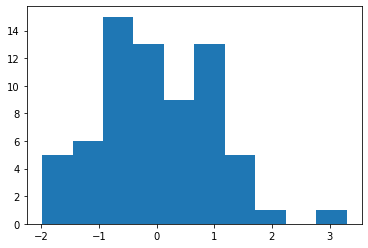

In [11]:
plt.hist(diff)

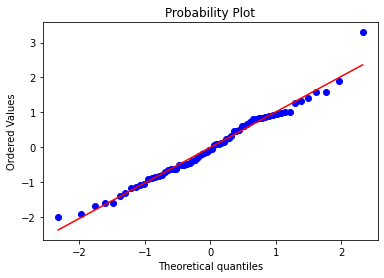

In [12]:
stats.probplot(diff, plot=plt, dist='norm')
plt.show()

### Shapiro Test for Normality
* Null Hypothesis : Data follows Normal Distribution.
* Alternative Hypothesis : Data does not follow Normal Distribution.

In [13]:
stats.shapiro(diff) # Test Statistic, P-value

ShapiroResult(statistic=0.9808470010757446, pvalue=0.37968671321868896)

* At 0.05 Level of Significance, p-value 0.14 is not < 0.05.
* Hence, we DO NOT REJECT the H0.
* The data follows Normal Distribution.

### Independent t-test
* Null Hypothesis : There is no difference in the mean of 2 groups. ( µ1 = µ2 )
* Alternative Hypothesis : Mean of group 1 is not equal to mean of group 2. ( µ1 <> µ2 )

In [14]:
stats.ttest_ind(tips_lunch["total_bill"], tips_dinner["total_bill"])

Ttest_indResult(statistic=-2.0725324762883566, pvalue=0.04013241105176228)

* At 5% Level of Signifcance, the p-value 0.13 is not < 0.05.
* Hence, we DO NOT REJECT the NULL Hypothesis
* There is no Statistical Difference between the Average Total Bill of Lunch and Dinner.

### Using Researchpy library 

In [15]:
descriptives, result = rp.ttest(tips_lunch["total_bill"], tips_dinner["total_bill"], equal_variances=True) # False if variance is unequal

In [16]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,68.0,17.168676,7.713882,0.935446,15.301519,19.035834
1,total_bill,68.0,19.820588,7.199246,0.873037,18.077999,21.563177
2,combined,136.0,18.494632,7.551516,0.647537,17.214003,19.775262


In [17]:
result

,Independent t-test,results
0,Difference (total_bill - total_bill) =,-2.6519
1,Degrees of freedom =,134.0000
2,t =,-2.0725
3,Two side test p value =,0.0401
4,Difference < 0 p value =,0.0201
5,Difference > 0 p value =,0.9799
6,Cohen's d =,-0.3554
7,Hedge's g =,-0.3534
8,Glass's delta =,-0.3438
9,r =,0.1762


## (B) Is there a relation between tip and smoking ?

In [18]:
tips.groupby("smoker")["tip"].describe().T

smoker,No,Yes
count,151.000000,93.000000
mean,2.991854,3.008710
std,1.377190,1.401468
min,1.000000,1.000000
25%,2.000000,2.000000
50%,2.740000,3.000000
75%,3.505000,3.680000
max,9.000000,10.000000


### Creating 2 independent samples

In [19]:
tips_smoker = tips[(tips["smoker"]=="Yes")]
tips_smoker.shape

(93, 7)

In [20]:
tips_non_smoker = tips[(tips["smoker"]=="No")]
tips_non_smoker.shape

(151, 7)

### Sampling to make the sample size equal

In [21]:
tips_non_smoker = tips_non_smoker.sample(93, random_state=123)
tips_non_smoker.shape

(93, 7)

### Levene's test to test the variance:

* Null Hypothesis : Variance of 2 groups is same.
* Alternative Hypothesis : Variance is not same.

In [22]:
stats.levene(tips_smoker["tip"], tips_non_smoker["tip"])

LeveneResult(statistic=0.17304172557702124, pvalue=0.6779073253317176)

* At 5% (0.05) Level of Significance, 0.67 is not < 0.05.
* Hence, we Do Not Reject the Null Hypothesis.
* Variance of 2 groups is Equal.

### Difference between 2 samples and by scaling it

In [23]:
tip_diff = scale(np.array(tips_smoker["tip"]) - np.array(tips_non_smoker["tip"]))
tip_diff

array([ 0.14724691, -0.73482941, -0.39724465, -0.74571924, -1.20309215,
        0.85508593, -1.4644481 ,  0.25070031,  0.12546725,  0.95309441,
       -0.05965988,  0.46305201,  0.98576391,  0.71351813, -0.64771076,
        1.55748004,  1.11099696,  0.72985287, -0.91995654,  0.55017066,
       -1.08330401,  0.34326387,  0.0383486 ,  0.12002233, -0.28290142,
        0.74618762,  0.01112402,  0.74074271,  0.16902657,  0.58828507,
       -0.9417362 , -0.97985061,  4.49228953, -0.01610056,  1.06743764,
        0.53928083,  1.52481055,  0.7734122 , -0.10321921, -1.55701166,
        0.22892064, -0.73482941,  0.99120882,  0.52294608,  0.16902657,
        1.47580631,  0.78974695, -0.91995654,  0.30514946, -1.84559218,
        0.1799164 , -1.4644481 ,  0.13091216, -0.53336753, -0.26112176,
        0.16902657, -3.14148209,  0.86053085, -1.77480828,  0.07101809,
        1.25800968, -1.82381252, -0.5551472 ,  0.16902657,  0.44127235,
        0.15813674, -0.96896078,  0.64273423,  0.32148421,  0.02

### Shapiro Test for Normality
* Null Hypothesis : Data is distributed Normally.
* Alternative Hypothesis : Data is not distributed Normally.

In [24]:
stats.shapiro(tip_diff)

ShapiroResult(statistic=0.9378699064254761, pvalue=0.00025142915546894073)

* At 0.05 Level of Significance, p-value 0.02 is < 0.05.
* Hence, we REJECT the Null Hypothesis.
* Data is not distributed Normally.
### Since the data is not normally distributed, we cannot Trust the results of t-test.

## 3. Two Paired Sample t-test

In [26]:
bp_data = pd.read_csv("C:\\Users\\ASHISH\\Desktop\\DataSets\\blood_pressure.csv")
bp_data.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [27]:
bp_data.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


### Levene's test to test the variance:

* Null Hypothesis : Variance of 2 groups is same.
* Alternative Hypothesis : Variance is not same.

In [28]:
stats.levene(bp_data["bp_before"],bp_data["bp_after"])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

* At 5% (0.05) Level of Significance, pvalue 0.02 is < 0.05.
* Hence, we Reject the Null Hypothesis.
* Variance of 2 groups is Not Equal.

### Scaled Residuals

In [30]:
bp_diff = scale(bp_data["bp_before"] - bp_data["bp_after"])
bp_diff

array([-0.9067432 , -0.72649607, -1.20715509,  0.35498671, -0.00550755,
       -0.1256723 ,  0.59531622,  0.41506909,  1.01589286,  1.676799  ,
       -1.20715509,  0.53523384,  1.49655187, -1.14707271, -0.9067432 ,
        1.25622236, -1.56764935,  2.21754039,  0.1146572 ,  0.41506909,
       -1.4474846 , -0.24583706,  0.59531622,  1.31630474, -0.06558993,
       -0.6664137 ,  0.65539859, -2.76929689,  0.29490433, -0.72649607,
        1.13605761,  2.39778752, -0.78657845, -2.468885  ,  0.83564572,
       -1.02690796, -0.78657845, -1.4474846 ,  2.39778752, -1.14707271,
       -0.9067432 , -0.30591944, -0.6664137 , -0.24583706,  1.31630474,
       -0.84666083, -0.1256723 ,  0.23482196, -1.14707271,  0.1146572 ,
        1.43646949,  0.59531622, -0.48616657,  0.29490433, -1.20715509,
        0.77556335, -2.04830836,  0.1146572 ,  0.35498671, -0.42608419,
       -0.1256723 , -0.00550755, -0.42608419,  0.05457483,  1.31630474,
       -0.18575468,  0.8957281 ,  0.65539859,  0.77556335, -0.12

(array([ 2.,  4.,  3., 23., 21., 24., 16., 17.,  7.,  3.]),
 array([-2.76929689, -2.25258844, -1.73588   , -1.21917156, -0.70246312,
        -0.18575468,  0.33095376,  0.8476622 ,  1.36437064,  1.88107908,
         2.39778752]),
 <BarContainer object of 10 artists>)

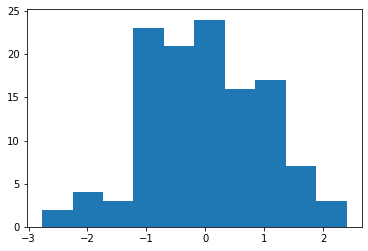

In [31]:
plt.hist(bp_diff)

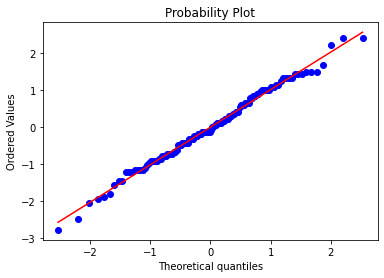

In [32]:
stats.probplot(bp_diff, plot=plt, dist='norm')
plt.show()

### Shapiro Test for Normality
* Null Hypothesis : Data is distributed Normally.
* Alternative Hypothesis : Data is not distributed Normally.

In [33]:
stats.shapiro(bp_diff)

ShapiroResult(statistic=0.992684006690979, pvalue=0.7841646671295166)

* At 0.05 Level of Significance, p-value 0.78 is not < 0.05.
* Hence, we DO NOT REJECT the Null Hypothesis.
* Data is distributed Normally.

### Since the variance is UN-EQUAL, we cannnot trust the result of 2 sample Paired T-test.
### 2 paired sample t-test
* Null Hypothesis : Mean of BP is Equal.
* Alternative Hypothesis : Mean of BP is Not Equal.

In [34]:
stats.ttest_rel(bp_data["bp_before"],bp_data["bp_after"])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

### Using Researchpy library 

In [35]:
rp.ttest(bp_data["bp_before"],bp_data["bp_after"],
                              equal_variances=False,
                              paired=True)

,Wilcoxon signed-rank test,results
0,Mean for bp_before =,156.450000
1,Mean for bp_after =,151.358333
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


* p-value 0.0014 is < 0.05 Level of Significance. Hence, Reject Null Hypothesis.
* There is significant difference in BP_Before and BP_after.

## 4. One Way ANOVA (1 Cat. variable with mult. groups and 1 Cont. variable)

In [36]:
tips["day"].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [37]:
tips.groupby('day')["total_bill"].describe().T

day,Fri,Sat,Sun,Thur
count,19.000000,87.000000,76.000000,62.000000
mean,17.151579,20.441379,21.410000,17.682742
std,8.302660,9.480419,8.832122,7.886170
min,5.750000,3.070000,7.250000,7.510000
25%,12.095000,13.905000,14.987500,12.442500
50%,15.380000,18.240000,19.630000,16.200000
75%,21.750000,24.740000,25.597500,20.155000
max,40.170000,50.810000,48.170000,43.110000


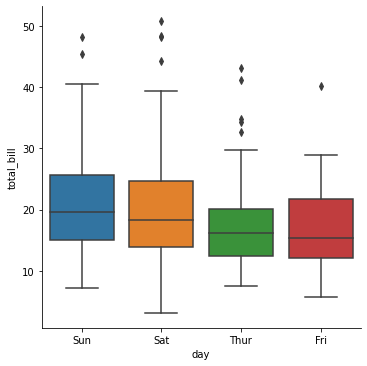

In [38]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)
plt.show()

* stats.f_oneway(y1x1,y2x2,y3x3)
* Null Hypothesis : Average Total Bill on All Days is Equal.
* Alternative Hypothesis : Average Total Bill on All Days is NOT Equal.

In [39]:
stats.f_oneway(tips['total_bill'][tips['day'] == "Thur"],
               tips['total_bill'][tips['day'] == "Fri"],
               tips['total_bill'][tips['day'] == "Sat"],
               tips['total_bill'][tips['day'] == "Sun"]
              )

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

* At 0.05 Level of Significance, p-value 0.04 is < 0.05.
* Hence, we REJECT the Null Hypothesis.
* There is difference in Average Total Bill on different Days.

## 5. Post-Hoc Test by using Tukey's Method

https://www.statisticshowto.com/tukey-test-honest-significant-difference/

In [40]:
# mul_com = MultiComparison(y,x)

mul_com = MultiComparison(tips["total_bill"],tips["day"])

In [41]:
mul_result = mul_com.tukeyhsd()
print(mul_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4554 -2.4802  9.0598  False
   Fri    Sun   4.2584 0.2373 -1.5859 10.1028  False
   Fri   Thur   0.5312    0.9 -5.4437   6.506  False
   Sat    Sun   0.9686 0.8921 -2.6089  4.5462  False
   Sat   Thur  -2.7586 0.2375 -6.5456  1.0284  False
   Sun   Thur  -3.7273 0.0669 -7.6266  0.1721  False
----------------------------------------------------


## 6. Two Way ANOVA (2 Cat. variables with 1 Conti. variable)

In [42]:
model1 = ols('total_bill ~ C(day)', data=tips).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.767
Date:                Mon, 08 Mar 2021   Prob (F-statistic):             0.0425
Time:                        21:04:03   Log-Likelihood:                -875.03
No. Observations:                 244   AIC:                             1758.
Df Residuals:                     240   BIC:                             1772.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         17.1516      2.020      8.489      0.000      13.172      21.132
C(day)[T.Sat]      3.2898      2.230      1.475      0.141      -1.103       7.683
C(day)[T.Sun]      4.2584      2.259      1.885      0.061      -0.191       8.708
C(day)[T.Thur]     0.5312      2.309      0.230      0.818      -4.018       5.080
==============================================================================
Omnibus:                       45.788   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.361
Skew:                           1.127   Prob(JB):                     2.36e-15
Kurtosis:                       4.241   Cond. No.                         8.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model2 = ols('total_bill ~ C(time)', data=tips).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     8.396
Date:                Mon, 08 Mar 2021   Prob (F-statistic):            0.00410
Time:                        21:04:04   Log-Likelihood:                -875.02
No. Observations:                 244   AIC:                             1754.
Df Residuals:                     242   BIC:                             1761.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           20.7972      0.661     31.460      0.000      19.495      22.099
C(time)[T.Lunch]    -3.6285      1.252     -2.898      0.004      -6.095      -1.162
==============================================================================
Omnibus:                       44.811   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.308
Skew:                           1.111   Prob(JB):                     6.58e-15
Kurtosis:                       4.218   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model_3 = ols('total_bill ~ C(day) + C(time)', data=tips).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.672
Date:                Mon, 08 Mar 2021   Prob (F-statistic):             0.0328
Time:                        21:04:05   Log-Likelihood:                -873.84
No. Observations:                 244   AIC:                             1758.
Df Residuals:                     239   BIC:                             1775.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           19.2809      2.449      7.874      0.000      14.457      24.105
C(day)[T.Sat]        1.1605      2.624      0.442      0.659      -4.008       6.329
C(day)[T.Sun]        2.1291      2.648      0.804      0.422      -3.087       7.345
C(day)[T.Thur]       4.0882      3.272      1.249      0.213      -2.358      10.535
C(time)[T.Lunch]    -5.7796      3.778     -1.530      0.127     -13.221       1.662
==============================================================================
Omnibus:                       45.480   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.039
Skew:                           1.116   Prob(JB):                     2.77e-15
Kurtosis:                       4.269   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model_4 = ols('total_bill ~ C(day) * C(time)', data=tips).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.200
Date:                Mon, 08 Mar 2021   Prob (F-statistic):             0.0551
Time:                        21:04:05   Log-Likelihood:                -873.67
No. Observations:                 244   AIC:                             1759.
Df Residuals:                     238   BIC:                             1780.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          19.6633      2.539      7.745      0.000      14.662      24.665
C(day)[T.Sat]                       0.7780      2.708      0.287      0.774      -4.557       6.113
C(day)[T.Sun]                       1.7467      2.732      0.639      0.523      -3.635       7.128
C(day)[T.Thur]                     -0.8833      9.154     -0.097      0.923     -18.916      17.149
C(time)[T.Lunch]                   -6.8176      4.183     -1.630      0.104     -15.057       1.422
C(day)[T.Sat]:C(time)[T.Lunch]           0          0        nan        nan           0           0
C(day)[T.Sun]:C(time)[T.Lunch]           0          0        nan        nan           0           0
C(day)[T.Thur]:C(time)[T.Lunch]     5.7024      9.803      0.582      0.561     -13.610      25.015
==============================================================================
Omnibus:                       45.019   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.138
Skew:                           1.107   Prob(JB):                     4.35e-15
Kurtosis:                       4.265   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
sm.stats.anova_lm(model_3)

,df,sum_sq,mean_sq,F,PR(>F)
C(day),3.0,643.941362,214.647121,2.78294,0.041613
C(time),1.0,180.545023,180.545023,2.34080,0.127347
Residual,239.0,18433.977698,77.129614,NaN,NaN


* For Day, p-value is 0.04. Hence, Reject the H01. Signifcant Releationship.
* For Time, p-value is 0.12. Hence, Do Not Reject the H02. No Significant Relationship.

In [47]:
sm.stats.anova_lm(model_4)

,df,sum_sq,mean_sq,F,PR(>F)
C(day),3.0,643.941362,214.647121,2.775236,0.042045
C(time),1.0,180.545023,180.545023,2.334320,0.127878
C(day):C(time),3.0,189.615042,63.205014,0.817196,0.485467
Residual,238.0,18407.808794,77.343734,NaN,NaN


* For Day, p-value is 0.04. Hence, Reject the H01. Signifcant Releationship.
* For Time, p-value is 0.12. Hence, Do Not Reject the H02. No Significant Relationship.
* For Day & Time Interaction, p-value is 0.48. Hence, Reject the H03. Significant Relationship in Interaction.

## 7. Chi - Square Test

In [48]:
smoker_gender = pd.crosstab(tips["sex"], tips["smoker"])
smoker_gender

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [49]:
chiSquare, p_value, d_o_f, expected_values = chi2_contingency(smoker_gender.values)

In [50]:
chiSquare   # chiSquare value

0.008763290531773594

In [51]:
p_value   # p_value

0.925417020494423

* p-value 0.92 is Not < 0.05. Hence, Do Not Reject H0. No Significant Relationship between Gender and Smoker.

In [52]:
d_o_f    # Degree of Freedom

1

In [54]:
expected_values    # Expected_values

array([[53.84016393, 33.15983607],
       [97.15983607, 59.84016393]])